In [2]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
def dipole(m, r, r0):
    """Calculate a field in point r created by a dipole moment m located in r0.
    Spatial components are the outermost axis of r and returned B.
    """
    # we use np.subtract to allow r and r0 to be a python lists, not only np.array
    R = np.subtract(np.transpose(r), r0).T
    
    # assume that the spatial components of r are the outermost axis
    norm_R = np.sqrt(np.einsum("i...,i...", R, R))
    
    # calculate the dot product only for the outermost axis,
    # that is the spatial components
    m_dot_R = np.tensordot(m, R, axes=1)

    # tensordot with axes=0 does a general outer product - we want no sum
    B = 3 * m_dot_R * R / norm_R**5 - np.tensordot(m, 1 / norm_R**3, axes=0)
    
    # include the physical constant
    B *= 1e-7

    return B

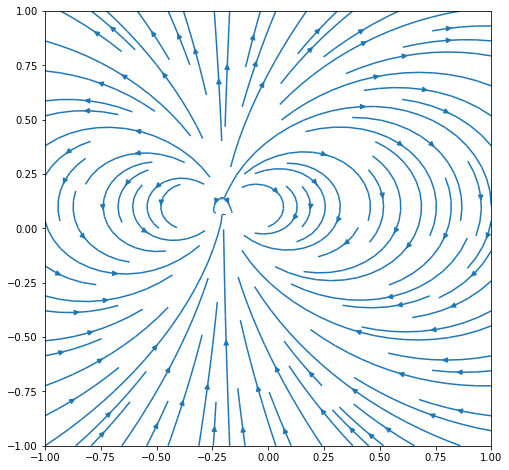

In [4]:
X = np.linspace(-1, 1)
Y = np.linspace(-1, 1)

Bx, By = dipole(m=[0, 0.1], r=np.meshgrid(X, Y), r0=[-0.2,0.1])

plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, Bx, By)
plt.margins(0, 0)

In [5]:
dipole(m=[1, 2, 3], r=[1, 1, 2], r0=[0, 0, 0])

array([2.38144836e-08, 1.70103454e-08, 4.08248290e-08])

In [31]:
import scipy as sc
import scipy.sparse as sparse
import scipy.sparse.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
 
    
# Number of internal points
N = 500
 
# Calculate Spatial Step-Size1
h = 1/(N+1.0)
 
# Create Temporal Step-Size, TFinal, Number of Time-Steps
k = h/2
TFinal = 1
NumOfTimeSteps = int(TFinal/k)
 
# Create grid-points on x axis
x = np.linspace(0,1,N+2)
x = x[1:-1]
 
# Initial Conditions
u = np.transpose(np.mat(np.exp(-(x-1/3)**2/(2*0.1**2))))
 
# Second-Derivative Matrix
data = np.ones((3, N))
data[1] = -2*data[1]
diags = [-1,0,1]
D2 = sparse.spdiags(data,diags,N,N)/(h**2)
 
# Identity Matrix
I = sparse.identity(N)
 
# Data for each time-step
data = []
 
for i in range(NumOfTimeSteps):
	# Solve the System: (I - k/2*D2) u_new = (I + k/2*D2)*u_old
	A = (I -k/2*D2)
	b = ( I + k/2*D2 )*u
	u = np.transpose(np.mat( sparse.linalg.spsolve( A,  b ) ))
 
	# Save Data
	data.append(u)
 


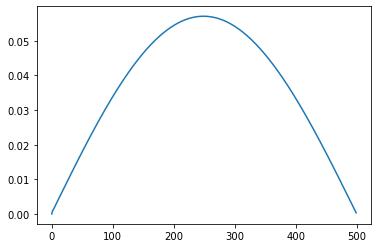

In [32]:
plt.plot(data[200])

In [23]:
h

0.004975124378109453

In [24]:
D2.todense()

matrix([[-80802.,  40401.,      0., ...,      0.,      0.,      0.],
        [ 40401., -80802.,  40401., ...,      0.,      0.,      0.],
        [     0.,  40401., -80802., ...,      0.,      0.,      0.],
        ...,
        [     0.,      0.,      0., ..., -80802.,  40401.,      0.],
        [     0.,      0.,      0., ...,  40401., -80802.,  40401.],
        [     0.,      0.,      0., ...,      0.,  40401., -80802.]])